**The dataset contains 13 features :**

1 Loan:	A unique id

2 Gender:	Gender of the applicant Male/female

3 Married:	Marital Status of the applicant, values will be Yes/ No

4 Dependents:	It tells whether the applicant has any dependents or not.

5 Education:	It will tell us whether the applicant is Graduated or not.

6 Self_Employed:	This defines that the applicant is self-employed i.e. Yes/ No

7 ApplicantIncome:	Applicant income

8 CoapplicantIncome:	Co-applicant income

9 LoanAmount:	Loan amount (in thousands)

10 Loan_Amount_Term:	Terms of loan (in months)

11 Credit_History:	Credit history of individual’s repayment of their debts

12 Property_Area:	Area of property i.e. Rural/Urban/Semi-urban 

13 Loan_Status:	Status of Loan Approved or not i.e. Y- Yes, N-No


In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
loandf=pd.read_csv("LoanApprovalPrediction.csv")
loandf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#checking null

loandf.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#dropping null data

loandf=loandf.dropna()

In [5]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 1 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            505 non-null    object 
 1   Gender             505 non-null    object 
 2   Married            505 non-null    object 
 3   Dependents         505 non-null    float64
 4   Education          505 non-null    object 
 5   Self_Employed      505 non-null    object 
 6   ApplicantIncome    505 non-null    int64  
 7   CoapplicantIncome  505 non-null    float64
 8   LoanAmount         505 non-null    float64
 9   Loan_Amount_Term   505 non-null    float64
 10  Credit_History     505 non-null    float64
 11  Property_Area      505 non-null    object 
 12  Loan_Status        505 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 55.2+ KB


In [6]:
#Dropping Loan_ID column

loandf.drop(['Loan_ID'],axis=1,inplace=True)

In [7]:
# Identify object columns

object_columns = []

for i in loandf.columns:
    if loandf[i].dtype == "object":
        object_columns.append(i)

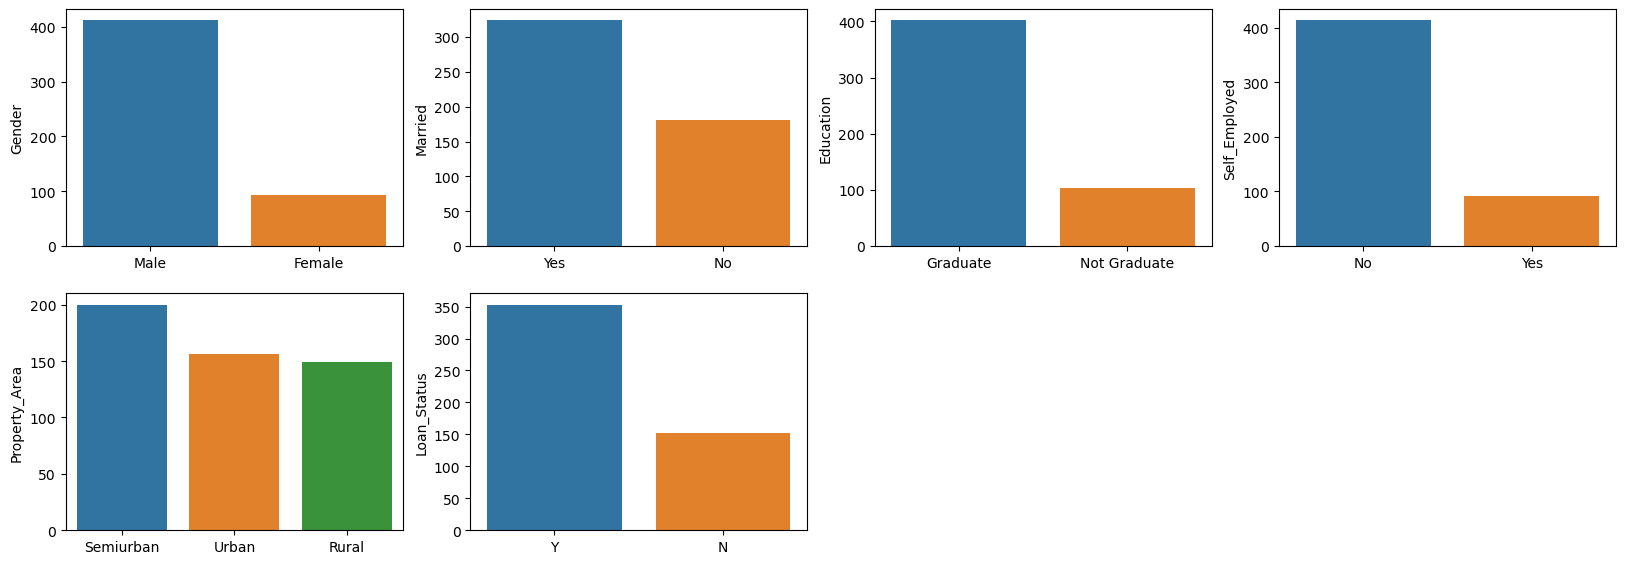

In [8]:
#visiluation object columns 

plt.figure(figsize=(20,40))
index = 1
           
for i in object_columns:
    y=loandf[i].value_counts()
    plt.subplot(11,4,index)
    sns.barplot(x=list(y.index), y=y)
    index +=1

In [9]:
# Import label encoder

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for col in object_columns:
    loandf[col] = label_encoder.fit_transform(loandf[col])

**Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine- learning project.**

In [10]:
#checking

categorical_count = len(loandf.dtypes[loandf.dtypes == 'object'])

print("Categorical variables:", categorical_count)

Categorical variables: 0


[]

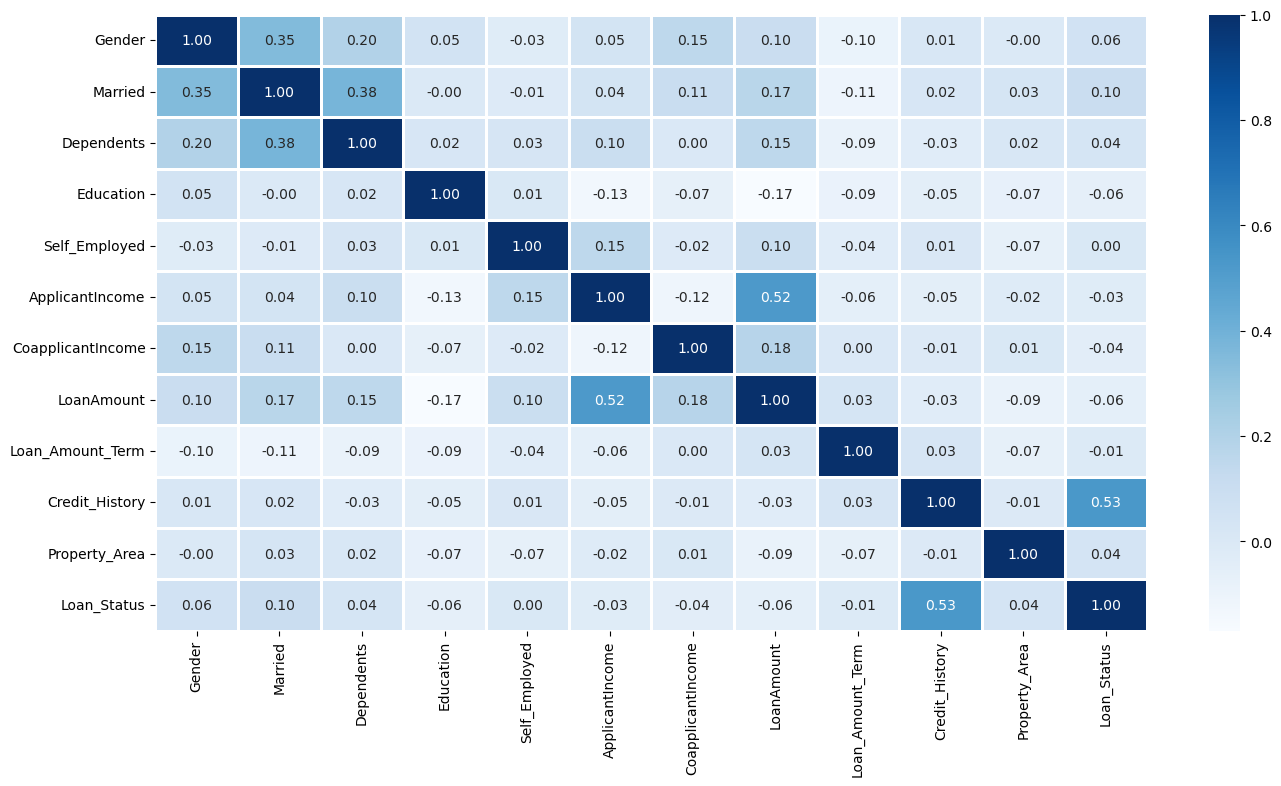

In [11]:
#visilation heatmap corr.

plt.figure(figsize=(16,8))
  
sns.heatmap(loandf.corr(),cmap='Blues',fmt='.2f',
            linewidths=2,annot=True)

plt.plot()

**The above haetmap showing that coorelation between Loan_status and Credit_History and also coorelation between Loan_Amount and Applicantincome**  

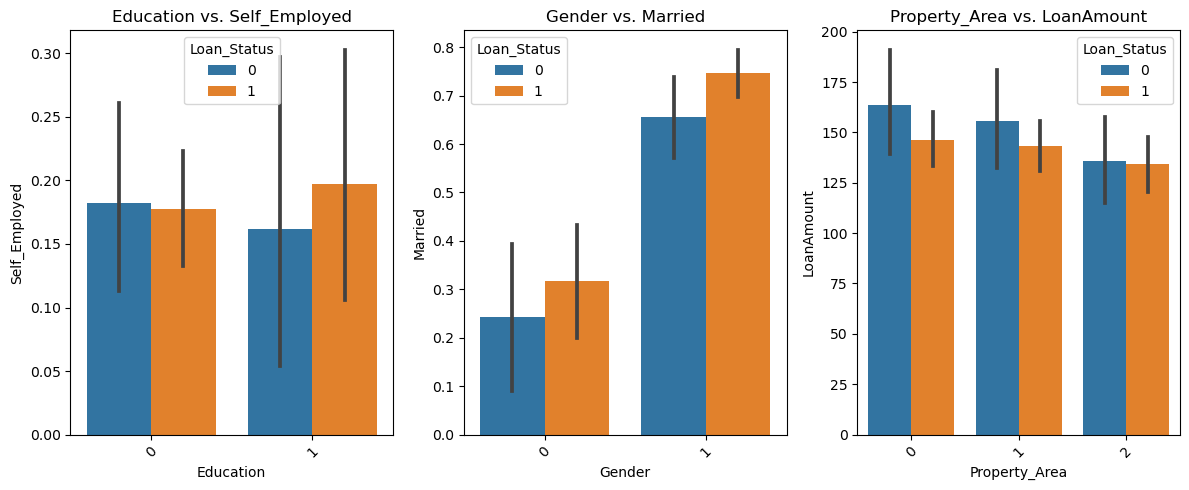

In [12]:
# Create a figure to display two graphs side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# First graphs
sns.barplot(x="Education", y="Self_Employed", hue="Loan_Status", data=loandf, ax=axes[0])
axes[0].set_title("Education vs. Self_Employed")

# Second graphs
sns.barplot(x="Gender", y="Married", hue="Loan_Status", data=loandf, ax=axes[1])
axes[1].set_title("Gender vs. Married")

# Third graphs
sns.barplot(x="Property_Area", y="LoanAmount", hue="Loan_Status", data=loandf, ax=axes[2])
axes[2].set_title("Property_Area vs. LoanAmount")

# Rotate axis labels
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
axes[2].tick_params(axis='x', rotation=45)

# Show graphics side by side
plt.tight_layout()
plt.show()


In [13]:
#Splitting into Train -Test Data

from sklearn.model_selection import train_test_split
  
X = loandf.drop(['Loan_Status'],axis=1)
Y = loandf['Loan_Status']

print(X.shape,Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3,random_state=1)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(505, 11) (505,)
(353, 11) (152, 11) (353,) (152,)


In [14]:
# Importing necassary Libraries to creating model and evaluation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
# Creating model

knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators = 4,criterion = 'entropy',random_state =1)
svc = SVC()
lr = LogisticRegression()

In [16]:
# We perform training and prediction operations by looping over the classifiers.
# We calculate and print the accuracy score of each classifier.

for clf in (rfc, knn, svc,lr):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_train, Y_pred))

Accuracy score of  RandomForestClassifier = 95.18413597733712
Accuracy score of  KNeighborsClassifier = 77.05382436260622
Accuracy score of  SVC = 72.80453257790369
Accuracy score of  LogisticRegression = 82.43626062322946


In [17]:
# We train and make predictions on test data by looping through each classifier.
# We calculate and print the accuracy score of each classifier.

for clf in (rfc, knn, svc,lr):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_test,Y_pred))

Accuracy score of  RandomForestClassifier = 68.42105263157895
Accuracy score of  KNeighborsClassifier = 59.210526315789465
Accuracy score of  SVC = 65.78947368421053
Accuracy score of  LogisticRegression = 77.63157894736842
